# **Prediksi Kualitas Apel - Izza Auliyai Rabby**

## **Deskripsi Proyek**

### **Deskripsi Latar Belakang Proyek Prediksi Kualitas Apel dengan Machine Learning**


Proyek ini bertujuan untuk mengembangkan model machine learning yang mampu memprediksi kualitas apel secara lebih cepat dan akurat. Proses penentuan kualitas apel yang dilakukan secara manual saat ini membutuhkan banyak waktu dan tenaga, serta rentan terhadap kesalahan manusia. Hal ini menyebabkan kerugian bagi petani dan distributor, serta mempengaruhi kepuasan konsumen. Dengan menggunakan model prediktif, masalah ini dapat diatasi melalui solusi yang lebih efisien, akurat, dan transparan, memberikan hasil yang lebih baik bagi semua pihak terkait.

Model AI dalam konteks ini berfungsi sebagai asisten yang membantu mengotomatisasi dan meningkatkan efisiensi prediksi kualitas apel. Dengan menggunakan machine learning, AI dapat menganalisis data secara lebih cepat dan akurat dibandingkan penilaian manual, mengurangi risiko kesalahan manusia, dan mempercepat proses penentuan kualitas. Hal ini bermanfaat bagi petani, distributor, serta konsumen, karena memberikan hasil yang lebih konsisten dan transparan dalam menentukan kualitas produk pertanian.

## 1. Import Library

In [1]:
!pip install -q kaggle

In [2]:
#Import Load data Library
import os
import numpy as np
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Import train test split
from sklearn.model_selection import train_test_split
# Import Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
#Import Model
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Random Forest Classifiers
from sklearn.ensemble import RandomForestClassifier
# Evaluation Matrix
from sklearn.metrics import accuracy_score
# Support Vector Machines
from sklearn.svm import SVC
# Naive Bayes
from sklearn.naive_bayes import BernoulliNB
# Extra Trees Classifiers
from sklearn.ensemble import ExtraTreesClassifier

## 2. Data Understanding  

Data Understanding adalah proses untuk memahami informasi yang terkandung dalam data dan mengevaluasi kualitas data tersebut. Hal ini mencakup analisis terhadap struktur, konten, dan relevansi data, serta identifikasi potensi masalah seperti missing values atau outliers yang dapat memengaruhi hasil analisis lebih lanjut.

### 2.1 Data Loading

Data Loading adalah tahap di mana data diimpor atau dimuat ke dalam lingkungan analisis dari berbagai sumber. Proses ini melibatkan pengumpulan data dari file, database, atau API eksternal untuk digunakan dalam pemrosesan lebih lanjut. Pada tahap ini, penting memastikan bahwa data berhasil dimuat dengan benar dan siap untuk dianalisis.


In [3]:
!kaggle datasets download -d nelgiriyewithana/apple-quality

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
License(s): other
apple-quality.zip: Skipping, found more recently modified local copy (use --force to force download)


## 2.1.2 Detail Datasets

Dataset ini berisi informasi tentang berbagai atribut dari sejumlah buah, memberikan wawasan mengenai karakteristiknya. Data mencakup detail seperti ID buah, ukuran, berat, tingkat kemanisan, kerenyahan, kadar jus, tingkat kematangan, keasaman, dan kualitas keseluruhan.

Dataset ini cocok untuk analisis :

Klasifikasi Buah : Kembangkan model klasifikasi untuk mengelompokkan buah-buahan berdasarkan fitur-fitur yang dimilikinya, seperti ukuran, berat, tingkat kematangan, dan keasaman.

Prediksi Kualitas : Buat model prediksi untuk menilai kualitas buah menggunakan berbagai atribut, seperti kerenyahan, tingkat kemanisan, dan kadar jus, dengan tujuan menghasilkan rating kualitas yang akurat berdasarkan karakteristik tersebut.



In [4]:
zip_ref = zipfile.ZipFile('/content/apple-quality.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [5]:
df = pd.read_csv('/content/apple_quality.csv')

# **2.2 Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) dalam Bahasa Indonesia adalah proses awal dalam analisis data untuk memahami struktur, pola, dan hubungan antar variabel di dalam dataset. Melalui EDA, kita dapat mengidentifikasi tren, mendeteksi anomali, serta memeriksa asumsi dasar sebelum melakukan pemodelan.

## **2.2.1 EDA - Deskripsi Variabel**

In [6]:
df.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


Dari dataframe di atas kita dapat melihat bahwa pada dataset ini terdapat 9 kolom. Diantaranya:

- `A_id` : Pengidentifikasi unik untuk setiap buah
- `Size` : Ukuran buah
- `Weight` : Berat buah
- `Sweetness` : Tingkat kemanisan buah
- `Crunchiness` : Tekstur yang menunjukkan kerenyahan buah
-` Juiciness` : Tingkat kesegaran buah
- `Ripeness` : Tahap kematangan buah
- `Acidity` : Tingkat keasaman buah
- `Quality` : Kualitas buah secara keseluruhan

In [7]:
df.drop("A_id",axis=1,inplace=True)

Dikarenakan kolom `A_id` tidak mempengaruhi model maka akan di drop / dihapus.





In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


Dari eksekusi method `df.info()` terdapat:

- Terdapat 6 kolom numerik dengan tipe data float64 yaitu: Size, Weight, Sweetness, Crunchiness, Juiciness dan Ripeness.
- Terdapat 2 kolom dengan tipe data object yaitu: Acidity dan Quality.

Namun pada data aslinya kolom ` Acidity` adalah bertipe float64, yang nantinya akan kita rubah.

In [9]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

In [10]:
df.shape

(4001, 8)

Dari eksekusi method` df.shape` Terlihat:
<br>

| Jumlah Baris | Jumlah Kolom |
| ------ | ------ |
| 4001 | 8 |


<br>

## **2.2.2 EDA - Menangani Missing Value dan Outliers**

In [11]:
df.duplicated().sum()

0

Melihat apakah terdapat data yang terduplikat.

In [12]:
df.Quality.value_counts(normalize=True)

,proportion
Quality,
good,0.501
bad,0.499


In [13]:
df.isnull().sum()

,0
Size,1
Weight,1
Sweetness,1
Crunchiness,1
Juiciness,1
Ripeness,1
Acidity,0
Quality,1


In [14]:
data_miss = df[df.isnull().any(axis=1)]
data_miss

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


Dapat dilihat terdapat missing value yang mana akan kita hapus.

In [15]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [16]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [17]:
df["Acidity"] = df["Acidity"].astype("float64")

Merubah tipe data kolom `Acidity` menjadi data float64.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


Dapat kita lihat:
- Jumlah data` Float64` ada 7 dan `object `ada 1.

In [19]:
df.shape

(4000, 8)

Jumlah datasets menjadi `4000` dikarenakan kita telah menghapus missing value.

**Visualisasi Outlier**



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


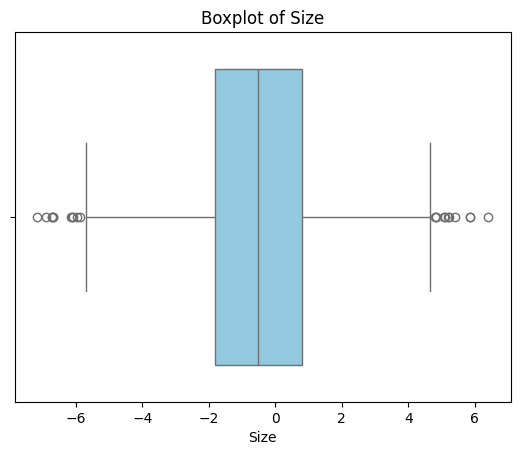

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


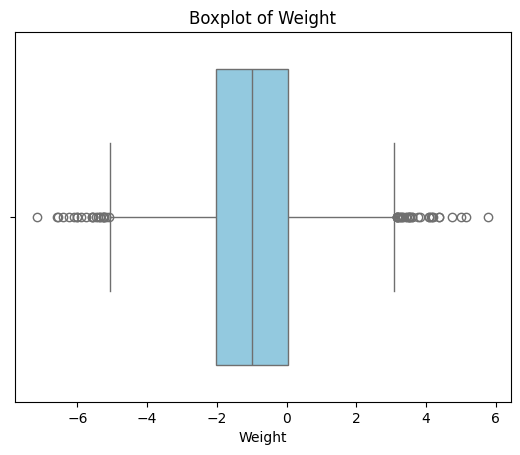

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


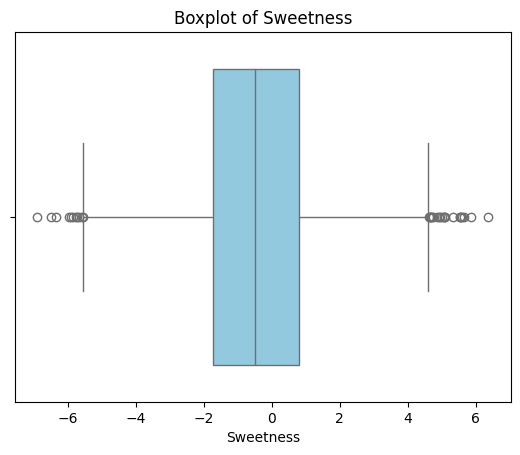

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


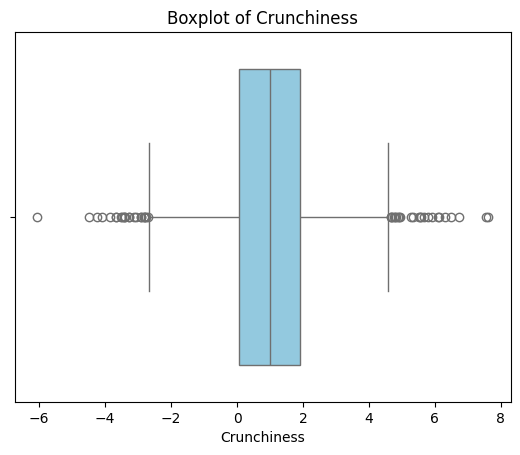

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


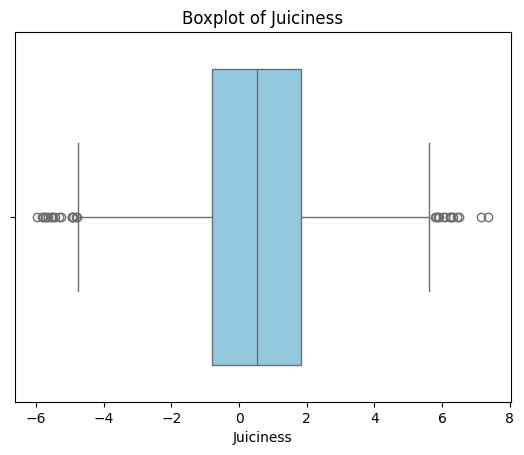

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


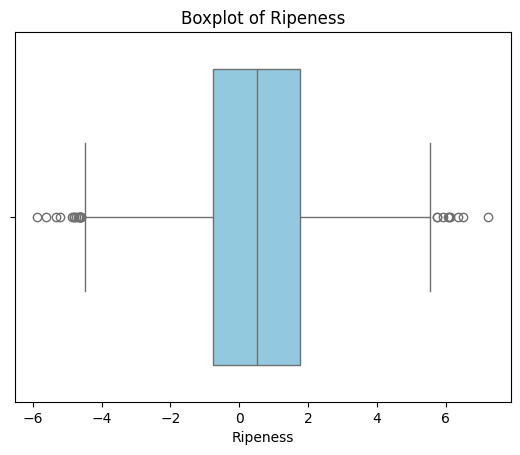

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


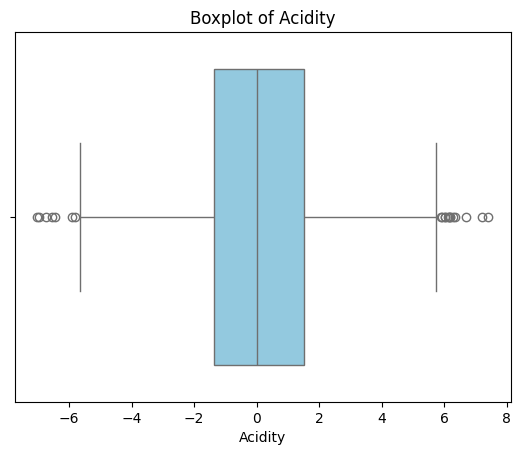

In [20]:
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
    plt.figure()
    sns.boxplot(data=df_outlier, x=column, color='skyblue')  # Change color here
    plt.title(f'Boxplot of {column}')  # Optional: Add title for clarity
    plt.show()  # Show the plot

*Menghapus outliers yang ada pada dataset*  


Pada kasus ini, kita akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, menangani outliers dengan teknik IQR method.


```
IQR = Inter Quartile Range
IQR = Q3 - Q1
```



In [21]:
# prompt: IQR = Inter Quartile Range
# IQR = Q3 - Q1

# Calculate the IQR for each numerical feature
for column in df_outlier:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Remove outliers
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Print the updated DataFrame
print(df)

          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
1    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
5    -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616   
...        ...       ...        ...          ...        ...       ...   
3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity Quality  
1    -0.722809    good  
2     2.621636     bad  
3     0.790723    good  
4     0.501984    good 

In [22]:
df.shape

(3786, 8)

Jumlah Datasets setalah kita hapus Outlier: `3758, 8`

## **2.2.3 EDA - Analisis Univariate **

Analisis univariat berfokus pada distribusi dan karakteristik dari setiap variabel dalam dataset. Ini mencakup pemeriksaan frekuensi, tendensi sentral, dan penyebaran dari setiap fitur secara individu. Metode umum yang digunakan termasuk histogram untuk data kontinu dan diagram batang untuk data kategorikal. Analisis ini membantu memahami bagaimana setiap variabel berperilaku sendiri, sebelum mengeksplorasi hubungan antar variabel. Selain itu, analisis ini juga berguna untuk mengidentifikasi outlier atau anomali yang memerlukan penanganan lebih lanjut.

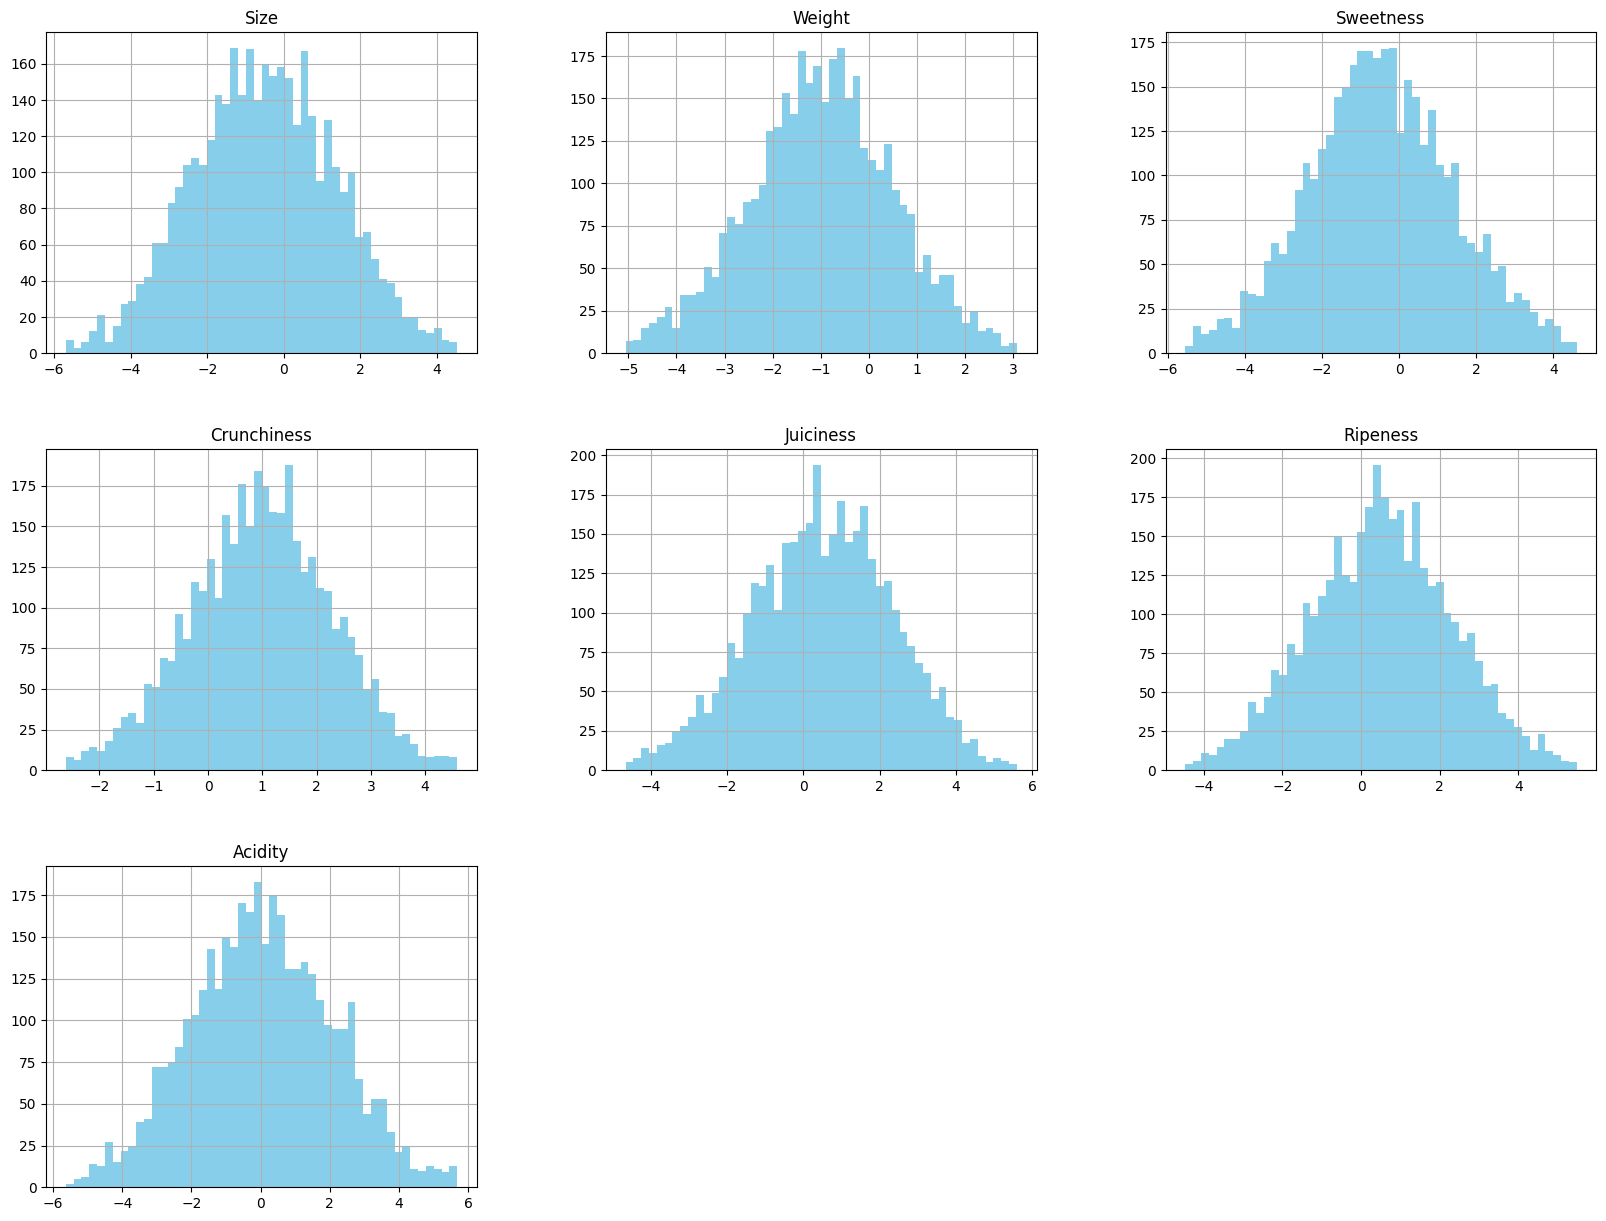

In [23]:
# Membuat histogram dengan warna biru langit
df.hist(bins=50, figsize=(20, 15), color='skyblue')
plt.show()

## **2.2.4 EDA - Analisis Multivariate**

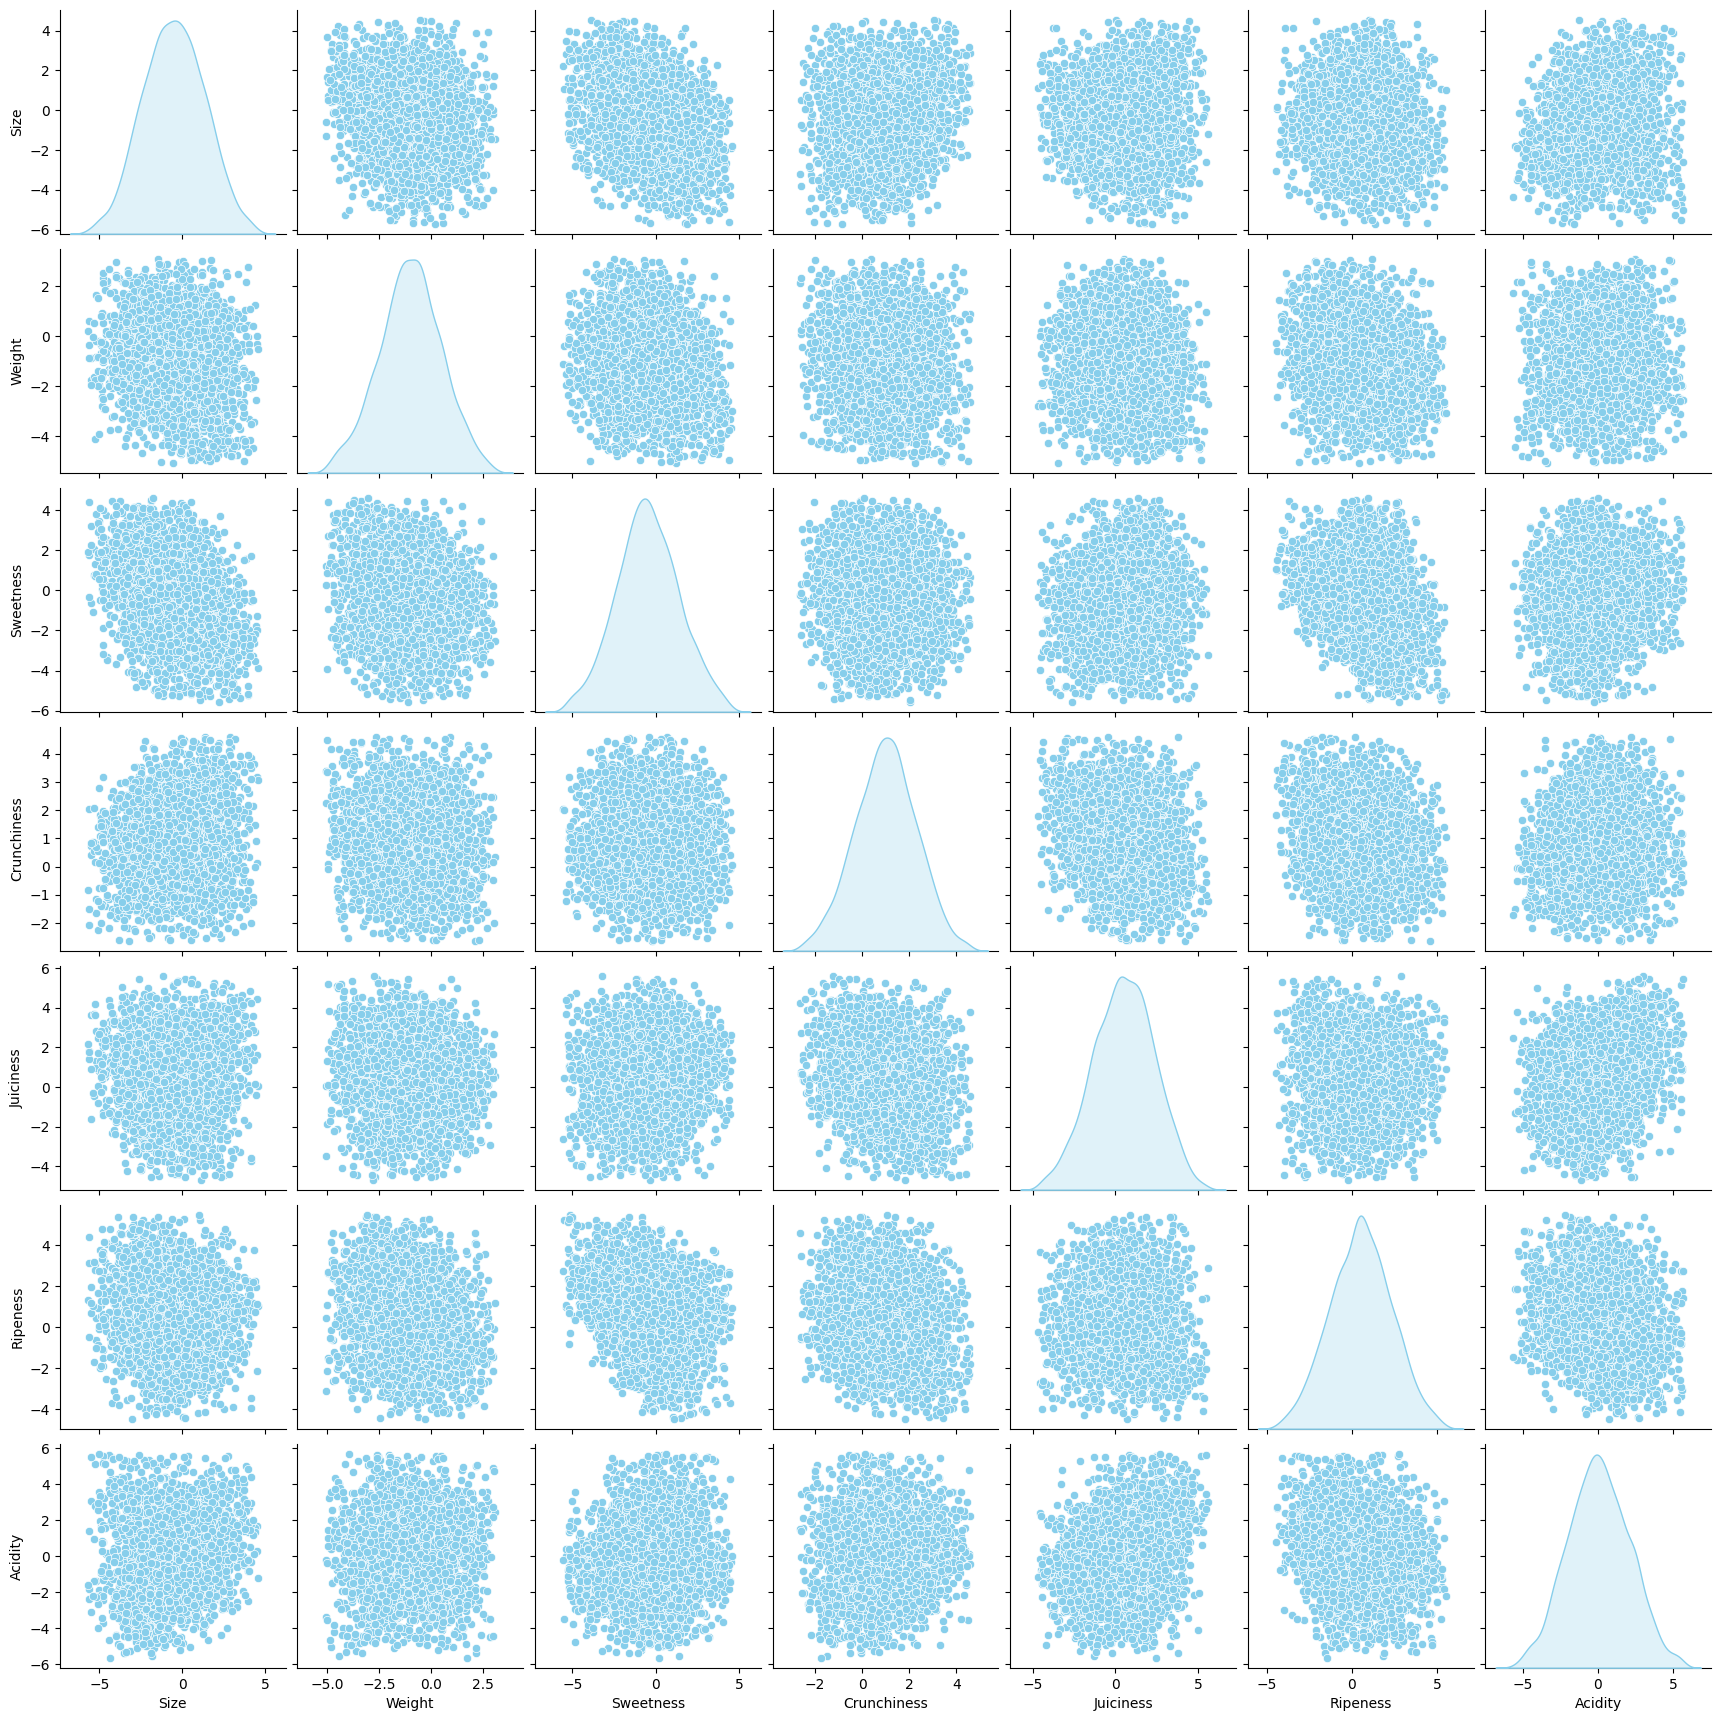

In [24]:
# Menggunakan pairplot dengan warna biru langit
sns.pairplot(df, diag_kind='kde', plot_kws={'color': 'skyblue'}, diag_kws={'color': 'skyblue'})

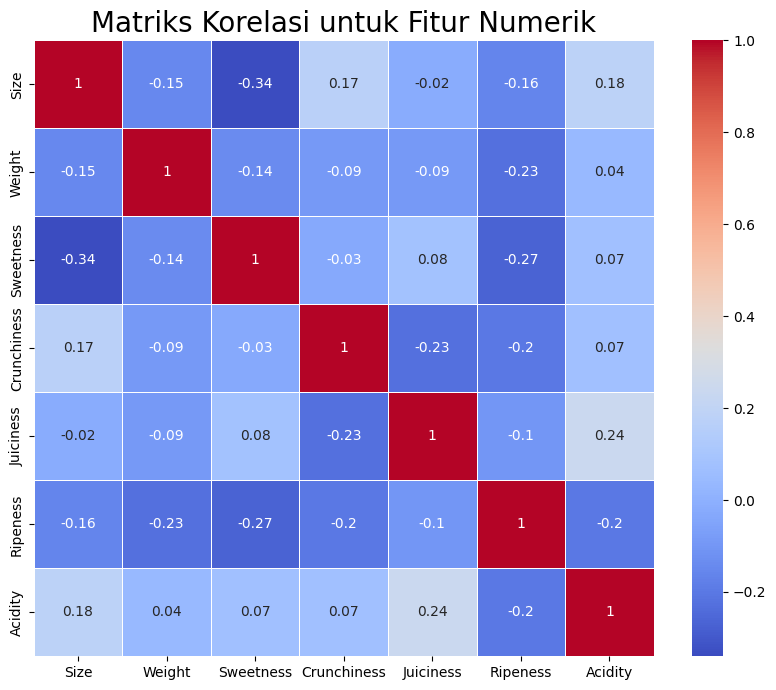

In [25]:
# Numerik Kolom Saja
numeric_df = df.select_dtypes(include=[float, int])

# Menghitung Matrik Korelasi
correlation_matrix = numeric_df.corr().round(2)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriks Korelasi untuk Fitur Numerik", size=20)
plt.show()


# **3. Data Preparation**

Data Preparation adalah langkah penting dalam proses pengembangan model Machine Learning, yang bertujuan untuk menyiapkan data agar siap digunakan dalam pelatihan model. Tahap ini meliputi pembersihan data, pengolahan nilai yang hilang, pengkodean variabel kategorikal, dan normalisasi atau standarisasi fitur. Dengan melakukan persiapan yang tepat, kualitas model yang dihasilkan dapat meningkat, sehingga meningkatkan akurasi dan keandalannya dalam melakukan prediksi.

## **3.1 Data Clening**

In [26]:
df.Quality = (df.Quality == "good").astype(int)  # good:1 , bad:0


In [27]:
x = df.drop("Quality",axis=1)
y = df.Quality

x.shape,y.shape

((3786, 7), (3786,))

## **3.2 Train-Test-Split**

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=60)

In [29]:
print(f'Total datasets: {len(x)}')
print(f'Total data Latih: {len(x_train)}')
print(f'Total data Uji: {len(x_test)}')

Total datasets: 3786
Total data Latih: 3028
Total data Uji: 758


## **3.3 Normalisasi**

In [30]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# **4. Model Development**

## **Lazy Predict Library**

**LazyPredict** adalah pustaka Python yang mempermudah dalam memilih model machine learning dengan cepat. Pustaka ini secara otomatis mengevaluasi dan membandingkan berbagai algoritma pembelajaran mesin pada dataset tertentu.

Keuntungan menggunakan LazyPredict:

Efisien dan cepat: LazyPredict dapat mengevaluasi dan membandingkan banyak model secara cepat, menghemat waktu dan tenaga.

Membantu menemukan model terbaik: LazyPredict mempermudah identifikasi model yang memiliki performa terbaik tanpa harus menguji satu per satu secara manual.

Sangat cocok untuk analisis awal: Ideal untuk memulai proyek machine learning tanpa terjebak dalam pemilihan model.

"Simplicity is the ultimate sophistication." - Leonardo da Vinci

In [31]:
!pip install lazypredict

In [32]:
# lazyclassifiyers
!pip install scikit-learn==1.0.2

from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
print(models)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 97%|█████████▋| 28/29 [00:12<00:00,  1.02it/s]

[LightGBM] [Info] Number of positive: 1490, number of negative: 1538
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 3028, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492074 -> initscore=-0.031707
[LightGBM] [Info] Start training from score -0.031707


100%|██████████| 29/29 [00:12<00:00,  2.25it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
KNeighborsClassifier               0.90               0.90     0.90      0.90   
SVC                                0.88               0.88     0.88      0.88   
ExtraTreesClassifier               0.88               0.88     0.88      0.88   
LGBMClassifier                     0.88               0.88     0.88      0.88   
LabelPropagation                   0.88               0.88     0.88      0.88   
XGBClassifier                      0.88               0.88     0.88      0.88   
LabelSpreading                     0.88               0.88     0.88      0.88   
RandomForestClassifier             0.88               0.88     0.88      0.88   
NuSVC                              0.87               0.87     0.87      0.87   
BaggingClassifier                  0.85               0.85     0.85      0.85   
QuadraticDiscriminantAnalysi

**Visualisasi Model LazyPredict**

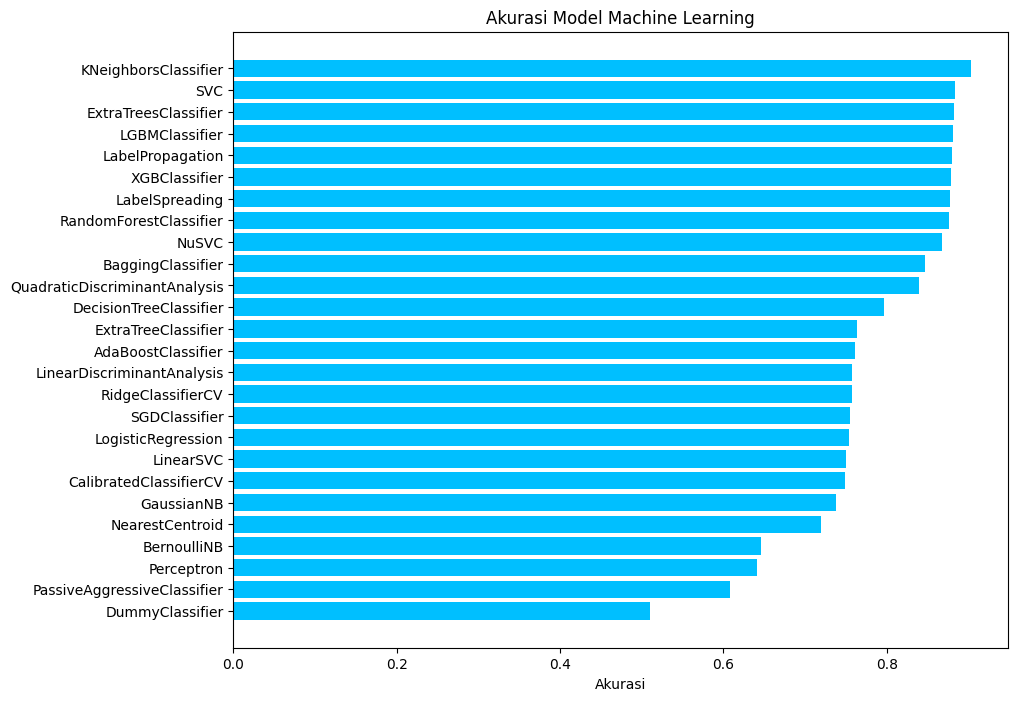

In [33]:
temp = models.sort_values(by="Accuracy", ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(temp.index, temp["Accuracy"], color='deepskyblue')  # Change color here
plt.xlabel("Akurasi")
plt.title("Akurasi Model Machine Learning")
plt.show()

In [34]:
# Memilih 7 Model saja
models = pd.DataFrame(index=['accuracy_score'],
                      columns=['KNN', 'RandomForest', 'SVM', 'Naive Bayes','Extra trees classifier', 'LogisticRegression', 'XGBClassifiers'])

## **4.1 KNN (K-Nearest Neighbor)**

In [49]:
model_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
model_knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [60]:
knn_pred = model_knn.predict(x_test)
models.loc['accuracy_score','KNN'] = accuracy_score(y_test, knn_pred)

## **4.2 Random Forest**

In [39]:
model_rf = RandomForestClassifier(max_depth= 20)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20)

In [40]:

rf_pred = model_rf.predict(x_test)
models.loc['accuracy_score','RandomForest'] = accuracy_score(y_test, rf_pred)


## **4.3 Support Vector Classifier**

In [41]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [42]:
svc_pred = model_svc.predict(x_test)
models.loc['accuracy_score','SVM'] = accuracy_score(y_test, svc_pred)

### **4.4 Naive Bayes**

In [43]:
model_nb = BernoulliNB()
model_nb.fit(x_train, y_train)

BernoulliNB()

In [44]:
nb_pred = model_nb.predict(x_test)
models.loc['accuracy_score','Naive Bayes'] = accuracy_score(y_test, nb_pred)

### **4.5 Extra trees classifier**

In [45]:
model_etc = ExtraTreesClassifier(n_estimators=100, max_depth= 10,n_jobs= 2,random_state= 100)
model_etc.fit(x_train, y_train)

ExtraTreesClassifier(max_depth=10, n_jobs=2, random_state=100)

In [46]:
etc_pred = model_etc.predict(x_test)
models.loc['accuracy_score','Extra trees classifier'] = accuracy_score(y_test, etc_pred)

# **5. Evaluasi Model**

## **5.1 Score Model**

In [61]:
# print(models) with description of accuracy and ecaluation metrics, create plots

import matplotlib.pyplot as plt
print(models)
print("Deskripsi Akurasi dan Metrik Evaluasi:")
print("Model KNN memiliki akurasi sebesar:", models.loc['accuracy_score','KNN'])
print("Model Random Forest memiliki akurasi sebesar:", models.loc['accuracy_score','RandomForest'])
print("Model SVM memiliki akurasi sebesar:", models.loc['accuracy_score','SVM'])
print("Model Naive Bayes memiliki akurasi sebesar:", models.loc['accuracy_score','Naive Bayes'])
print("Model Extra Trees Classifier memiliki akurasi sebesar:", models.loc['accuracy_score','Extra trees classifier'])

                KNN RandomForest  SVM Naive Bayes Extra trees classifier  \
accuracy_score 0.90         0.87 0.88        0.51                   0.86   

               LogisticRegression XGBClassifiers  
accuracy_score                NaN            NaN  
Deskripsi Akurasi dan Metrik Evaluasi:
Model KNN memiliki akurasi sebesar: 0.9010554089709762
Model Random Forest memiliki akurasi sebesar: 0.8720316622691293
Model SVM memiliki akurasi sebesar: 0.8825857519788918
Model Naive Bayes memiliki akurasi sebesar: 0.5092348284960422
Model Extra Trees Classifier memiliki akurasi sebesar: 0.8601583113456465


## **5.2 plot Model**

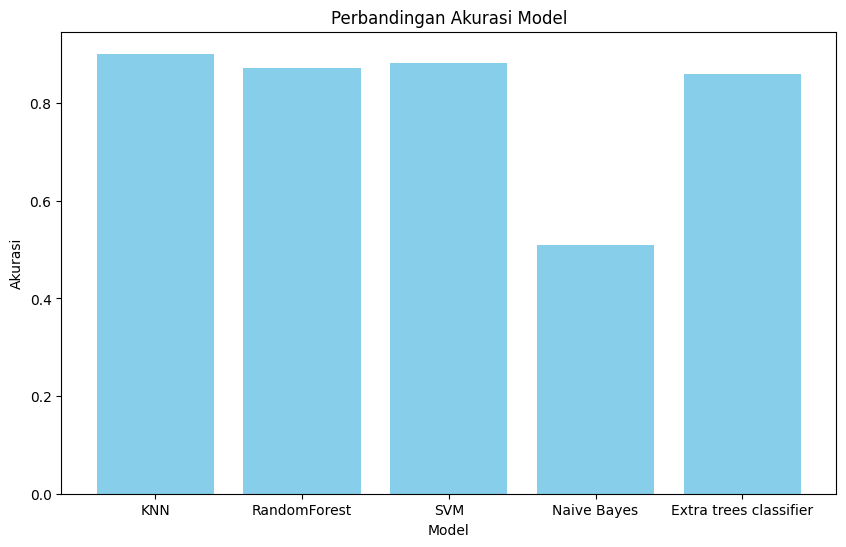

Deskripsi Plot:
Plot ini menampilkan perbandingan akurasi dari berbagai model machine learning yang telah dievaluasi pada dataset apel. 
Sumbu X menunjukkan model yang digunakan, dan sumbu Y menunjukkan skor akurasi yang dicapai oleh masing-masing model.
Berdasarkan plot ini, kita dapat dengan mudah membandingkan kinerja setiap model dan mengidentifikasi model mana yang memiliki akurasi terbaik dalam memprediksi kualitas apel.
Model dengan akurasi tertinggi dapat digunakan sebagai model terbaik untuk memprediksi kualitas apel pada dataset yang sama atau pada dataset baru yang serupa.

Analisis dan Interpretasi:
Berdasarkan perbandingan model, model Random Forest dan Extra trees classifier menunjukkan akurasi yang tinggi dalam memprediksi kualitas apel.
Ini mungkin karena kemampuan model ini untuk menangani kompleksitas data dan membuat keputusan berdasarkan banyak fitur.
Model lainnya seperti KNN, SVM, dan Naive Bayes juga menunjukkan akurasi yang cukup baik, tetapi mungkin kurang opti

In [62]:
# buat plot dan deskripsinya secara holistik

import matplotlib.pyplot as plt
# Create a bar plot for model accuracy
plt.figure(figsize=(10, 6))
plt.bar(models.columns, models.loc['accuracy_score'], color='skyblue')
plt.xlabel("Model")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Model")
plt.show()


# Description of the plot
print("Deskripsi Plot:")
print("Plot ini menampilkan perbandingan akurasi dari berbagai model machine learning yang telah dievaluasi pada dataset apel. ")
print("Sumbu X menunjukkan model yang digunakan, dan sumbu Y menunjukkan skor akurasi yang dicapai oleh masing-masing model.")
print("Berdasarkan plot ini, kita dapat dengan mudah membandingkan kinerja setiap model dan mengidentifikasi model mana yang memiliki akurasi terbaik dalam memprediksi kualitas apel.")
print("Model dengan akurasi tertinggi dapat digunakan sebagai model terbaik untuk memprediksi kualitas apel pada dataset yang sama atau pada dataset baru yang serupa.")

# Optional: Add more specific descriptions for each model, e.g.
# print("Model KNN menunjukkan akurasi yang cukup baik...")
# print("Model Random Forest menunjukkan akurasi yang sangat baik...")

# Further Analysis and Interpretations
print("\nAnalisis dan Interpretasi:")
print("Berdasarkan perbandingan model, model Random Forest dan Extra trees classifier menunjukkan akurasi yang tinggi dalam memprediksi kualitas apel.")
print("Ini mungkin karena kemampuan model ini untuk menangani kompleksitas data dan membuat keputusan berdasarkan banyak fitur.")
print("Model lainnya seperti KNN, SVM, dan Naive Bayes juga menunjukkan akurasi yang cukup baik, tetapi mungkin kurang optimal dibandingkan Random Forest dan Extra trees classifier dalam dataset ini.")

### Mendapatkan Requirement txt

In [53]:
!pip freeze > requirements.txt

In [54]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>